In [13]:
import pandas as pd

POI = pd.read_csv('original_data/cell_POIcat.csv')
task1_df = pd.read_csv('original_data/task1_dataset.csv')
task2_df = pd.read_csv('original_data/task2_dataset.csv')

In [14]:
task1_df.head(5)

,uid,d,t,x,y
0,0,0,1,79,86
1,0,0,2,79,86
2,0,0,8,77,86
3,0,0,9,77,86
4,0,0,19,81,89


适用tft模型的数据处理   
1. day和time整合在一个新的列中，保留day
2. 为每个grid创建一个地点的id 
  
测试的需求   
1. 取20个人完整的行程
2. poi先不考虑

In [15]:
sample_df = task1_df[task1_df['uid'].between(100, 120)]

In [19]:
sample_df['t'].max()

47

In [20]:
base_datetime = pd.to_datetime('2020-01-01')
sample_df['datetime'] = base_datetime + pd.to_timedelta(
    sample_df['d'], unit='D') + pd.to_timedelta(sample_df['t'] * 0.5, unit='H')

/var/folders/v1/b3bx117j02qghrlmbvc478780000gn/T/ipykernel_20034/596778293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['datetime'] = base_datetime + pd.to_timedelta(


In [22]:
sample_df.tail()

,uid,d,t,x,y,datetime
161903,120,74,25,128,80,2020-03-15 12:30:00
161904,120,74,29,129,79,2020-03-15 14:30:00
161905,120,74,30,133,79,2020-03-15 15:00:00
161906,120,74,41,130,100,2020-03-15 20:30:00
161907,120,74,42,126,127,2020-03-15 21:00:00


In [23]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27602 entries, 134306 to 161907
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   uid       27602 non-null  int64         
 1   d         27602 non-null  int64         
 2   t         27602 non-null  int64         
 3   x         27602 non-null  int64         
 4   y         27602 non-null  int64         
 5   datetime  27602 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.5 MB


In [29]:
# Calculate the unique identifier for each pair of (x, y)
sample_df['location_id'] = (
    sample_df['x'] - sample_df['x'].min()) * (
    sample_df['y'].max() - sample_df['y'].min() + 1) + (
    sample_df['y'] - sample_df['y'].min()
    )+ 1

/var/folders/v1/b3bx117j02qghrlmbvc478780000gn/T/ipykernel_20034/1200136462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['location_id'] = (


In [31]:
sample_df.head()

,uid,d,t,x,y,datetime,location_id
134306,100,0,6,150,116,2020-01-01 03:00:00,29916
134307,100,0,8,150,116,2020-01-01 04:00:00,29916
134308,100,0,10,150,115,2020-01-01 05:00:00,29915
134309,100,0,14,150,115,2020-01-01 07:00:00,29915
134310,100,0,15,150,115,2020-01-01 07:30:00,29915


In [32]:
import os
output_folder = "tft_outputs/data/humob"
output_file_path = os.path.join(output_folder, "humob_data.csv")

sample_df.to_csv(output_file_path, index=False)

### task1 free exploration

In [6]:
task1_df.head()

,uid,d,t,x,y
0,0,0,1,79,86
1,0,0,2,79,86
2,0,0,8,77,86
3,0,0,9,77,86
4,0,0,19,81,89


In [9]:
unique_uid_count = task1_df['uid'].nunique()
print(f"Number of unique UIDs: {unique_uid_count}")

Number of unique UIDs: 100000


In [18]:
print(task1_df['x'].max(), task1_df['y'].max(), task1_df['t'].max(), task1_df['d'].max())

999 999 47 74


In [19]:
filtered_y = task1_df[task1_df['y'] != 999]
max_y_value_except_999 = filtered_y['y'].max()
print(max_y_value_except_999)

200


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for uid=1, day=0
user_data = task1_df[(task1_df['uid'] == 1) & (task1_df['d'] == 0)]
user_data


,uid,d,t,x,y
1261,1,0,0,67,85
1262,1,0,2,67,84
1263,1,0,5,67,85
1264,1,0,7,67,84
1265,1,0,9,67,85
1266,1,0,11,67,84
1267,1,0,12,67,84
1268,1,0,13,67,85
1269,1,0,14,67,84
1270,1,0,15,67,85


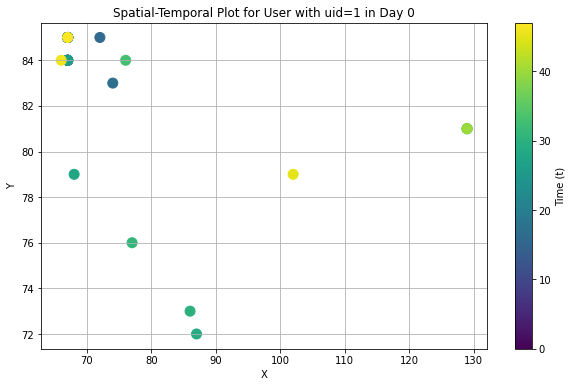

In [33]:
import matplotlib.pyplot as plt

# Create a spatial-temporal plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(user_data['x'], user_data['y'], c=user_data['t'], cmap='viridis', s=100)
plt.colorbar(scatter, label='Time (t)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spatial-Temporal Plot for User with uid=1 in Day 0')
plt.grid(True)
plt.show()


### POI free exploration

In [20]:
POI.head()

,x,y,POIcategory,POI_count
0,1,1,48,4
1,1,1,58,1
2,1,1,59,1
3,1,1,69,2
4,1,1,73,1


In [34]:
print(POI['POIcategory'].max())

85


In [24]:
# Filter the DataFrame for x=1 and y=1
filtered_poi = POI[(POI['x'] == 1) & (POI['y'] == 1)]

# Group by POI category and calculate the sum of POI_count
poi_category_counts = filtered_poi.groupby('POIcategory')['POI_count'].sum()

# Get the total number of POIs
total_poi_count = filtered_poi['POI_count'].sum()

print("POI Category Counts for (1,1)")
print(poi_category_counts)

print(f"Total number of POIs at (1, 1): {total_poi_count}")


POI Category Counts for (1,1)
POIcategory
48    4
58    1
59    1
69    2
73    1
74    4
79    2
Name: POI_count, dtype: int64
Total number of POIs at (1, 1): 15


In [26]:
# Group by (x, y) coordinates and calculate the average POI_count
average_poi_per_grid = POI['POI_count'].sum()/200/200

print("Average POI Count for Each Grid:")
print(average_poi_per_grid)

Average POI Count for Each Grid:
12.379275


In [1]:
import pandas as pd

df = pd.read_csv('tft_outputs/data/electricity/hourly_electricity.csv')

In [2]:
df.columns

Index(['Unnamed: 0', 'power_usage', 't', 'days_from_start', 'categorical_id',
       'date', 'id', 'hour', 'day', 'day_of_week', 'month', 'hours_from_start',
       'categorical_day_of_week', 'categorical_hour'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198072 entries, 0 to 2198071
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   power_usage              float64
 2   t                        float64
 3   days_from_start          int64  
 4   categorical_id           object 
 5   date                     object 
 6   id                       object 
 7   hour                     int64  
 8   day                      int64  
 9   day_of_week              int64  
 10  month                    int64  
 11  hours_from_start         float64
 12  categorical_day_of_week  int64  
 13  categorical_hour         int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 234.8+ MB


In [5]:
df.head()

,Unnamed: 0,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour
0,17544,2.538071,26304.0,1096,MT_001,2014-01-01 00:00:00,MT_001,0,1,2,1,26304.0,2,0
1,17545,2.855330,26305.0,1096,MT_001,2014-01-01 01:00:00,MT_001,1,1,2,1,26305.0,2,1
2,17546,2.855330,26306.0,1096,MT_001,2014-01-01 02:00:00,MT_001,2,1,2,1,26306.0,2,2
3,17547,2.855330,26307.0,1096,MT_001,2014-01-01 03:00:00,MT_001,3,1,2,1,26307.0,2,3
4,17548,2.538071,26308.0,1096,MT_001,2014-01-01 04:00:00,MT_001,4,1,2,1,26308.0,2,4


In [7]:
valid_boundary=1315
test_boundary=1339
index = df["days_from_start"]
#train = df.loc[index < valid_boundary]
#valid = df.loc[(index >= valid_boundary - 7) & (index < test_boundary)]
test = df.loc[index >= test_boundary - 7]

In [11]:
print(df['hours_from_start'].min(), df['hours_from_start'].max(), df['month'].min(), df['month'].max())

26304.0 32303.0 1 9


In [12]:
print(df['day'].min(), df['day'].max())

1 31
